# Dataproject 
This data project is made by NAME 1 NAME 2 NAME 3. 

In this project, we examine data from the OECD statistics bank. We look at data about greenhouse gas emissions, and average wages, in all the countries. The project is structured such that we begin by importing, examining and cleaning out data. Afterwards, we estimate new variables, and plot different descriptive statistics for the OECD countries. We finish the project by introducing an interactive model, that give the reader data for whatever OECD country they would like. 

In [19]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Data import and cleaning
In this section we import the two datasets, and clean them up one after the other. We begin by cleaning the enviromental dataset, afterwards we clean the wage dataset 

In [64]:
# a. Import of enviromental data form the OECD statistics bank API
df = pdr.DataReader("AIR_GHG","oecd")
df.head()

# b. Import of locally placed OECD data on wages
df_wages= pd.read_csv("oecdwages.csv")
print("This is the first 5 rows of the wages dataset")
df_wages.head()

This is the first 5 rows of the wages dataset


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,AVWAGE,TOT,USD,A,2010,48111.546431,NaN
1,AUS,AVWAGE,TOT,USD,A,2011,49621.840441,NaN
2,AUS,AVWAGE,TOT,USD,A,2012,49900.648070,NaN
3,AUS,AVWAGE,TOT,USD,A,2013,49648.772056,NaN
4,AUS,AVWAGE,TOT,USD,A,2014,49988.558205,NaN


The dataset fore wages in the OECD countries seems tidy, with variables in the columns and units in the rows. The Envoriromental dataset is not tidy though. It is multi-indexed, with hierachical columns. In the below section we make the enviromental dataset tidy.

In [65]:
# a. The eviromental data is multi-indexed. Therefore we rearrange the index of the dataset
df.reset_index()
dir(df.index)
df.columns = [' '.join(col).strip() for col in df.columns.values]

# b. In this section, we define a dictionary with all the countries and the countrycodes for the OECD countries
countries = ["Australia","Austria","Belgium","Canada","Chile","Czech Republic","Denmark","Estonia","Finland","France",
             "Germany","Greece","Hungary","Iceland","Ireland","Israel","Italy","Japan","Korea","Latvia","Lithuania",
             "Luxembourg","Mexico","Netherlands","New Zealand","Norway","Poland","Portugal","Slovak Republic",
             "Slovenia","Spain","Sweden","Switzerland","United Kingdom","United States"]
countrycode = ["AUS", "AUT", "BEL", "CAN", "CHL", "CZE", "DNK", "EST", "FIN", "FRA", "DEU","GRC", "HUN", "ISL", 
               "IRL", "ISR", "ITA", "JPN", "KOR", "LVA", "LTU", "LUX", "MEX", "NLD", "NZL", "NOR", "POL", "PRT",
               "SVK", "SVN", "SWE", "ESP", "CHE", "GBR", "USA"]

ccc = dict(zip(countries,countrycode))


# c. We make a tidy dataset, by making a row for each country in each year, and add the variable "Greenhouse gases..." 
    #to this new data set
    # c.i.  I initiate an empty list for the dataset and set a counter to 0
x = []
i = 0
    #c.ii. Iniate the for-loop that adds the rows to the dataset
for c in countries:
    for y in df.index.values : 
        x.append({"country" : c, "countrycode" : ccc[c],"emissions_GHG" : df[c+" "+"Greenhouse gases Total  emissions excluding LULUCF"][i]})
        i = i + 1 
        if i > 6 :
            i = 0
    # c.iii. Examening the new dataset  
df_env = pd.DataFrame(x)
df_env.head()


,country,countrycode,emissions_GHG
0,Australia,AUS,539171.826
1,Australia,AUS,540445.363
2,Australia,AUS,543593.864
3,Australia,AUS,533313.692
4,Australia,AUS,527325.581


Now that we have a tidy dataset for enviromental data, we want to clean up the dataset for wages. 

In [66]:
# a. We define the variables that we do not need in our analysis, and drop them
drop_these= ["INDICATOR","FREQUENCY","MEASURE","SUBJECT", "Flag Codes"]
df_wages = df_wages.drop(drop_these, axis=1, inplace=False)

# b. We change the name of some of the variables
df_wages.rename(columns = {'LOCATION':'countrycode', 'Value' : 'average wage', 'TIME' : 'year'}, inplace=True)


## Mergin data sets
In this section we combine out two datasets, in order to get one tidy dataset, that we can do analysis on. 

In [67]:
# a. Test of whether the datasets are good to merge, by looking at their shape 
print("Shape of eviromental dataset:" , df_env.shape)
print("Shape of wages dataset:" , df_wages.shape)
print("Since they both have the same amount of rows, they should be good to merge, after we sort by countrycode")

Shape of eviromental dataset: (245, 3)
Shape of wages dataset: (245, 3)
Since they both have the same amount of rows, they should be good to merge, after we sort by countrycode


In [68]:
# a. We defne the two datasets, and reset their index
left = df_wages.sort_values("countrycode")
left = left.reset_index()
rigth = df_env.sort_values("countrycode")
rigth = rigth.reset_index()

# b. We merge the two datasets with a left merge
data_all = left.merge(rigth,left_index=True,right_index=True)
data_all.head()

,index_x,countrycode_x,year,average wage,index_y,country,countrycode_y,emissions_GHG
0,0,AUS,2010,48111.546431,0,Australia,AUS,539171.826
1,1,AUS,2011,49621.840441,1,Australia,AUS,540445.363
2,2,AUS,2012,49900.648070,2,Australia,AUS,543593.864
3,3,AUS,2013,49648.772056,3,Australia,AUS,533313.692
4,4,AUS,2014,49988.558205,4,Australia,AUS,527325.581


 Now the wage dataset and the envoriment dataset, have been merget into one. To make sure that they correctly merged, we use an algorithm, that tells us if any of the two countrycode variables, do not have identical values in a row. 

In [69]:
# a. This for-loop test whether or not the data has been merge correctly 
for i in data_all.index.values : 
    # a.i. This statement checks if all the rows have the same countrycode in the two countrycode variables
    if data_all["countrycode_x"][i]==data_all["countrycode_y"][i] :
        if i == data_all.index.values[-1] : 
            print("No mistakes in the mergin process")
    else :  
        print("mistake in "+data_all["country"][i])

No mistakes in the mergin process


In [70]:
# a. This section, drops the extra contrycode variable
drop_these= ["index_x","index_y","countrycode_y"]
data_all = data_all.drop(drop_these, axis=1, inplace=False)

data_all.rename(columns ={"countrycode_x":"countrycode"},inplace=True)

# b. Then we sort the dataset by countrycode and year, afterwards we reset the index
data_all = data_all.sort_values(by=["countrycode","year"])
data_all = data_all.reset_index(drop=True)
print(data_all.head())
print(data_all.tail())

  countrycode  year  average wage    country  emissions_GHG
0         AUS  2010  48111.546431  Australia     539171.826
1         AUS  2011  49621.840441  Australia     540445.363
2         AUS  2012  49900.648070  Australia     543593.864
3         AUS  2013  49648.772056  Australia     533313.692
4         AUS  2014  49988.558205  Australia     527325.581
    countrycode  year  average wage        country  emissions_GHG
240         USA  2012  58669.213014  United States    6528790.267
241         USA  2013  58411.632426  United States    6771119.194
242         USA  2014  59249.922950  United States    6922945.797
243         USA  2015  60691.661713  United States    6638132.739
244         USA  2016  60685.807911  United States    6763141.326


## Creating new variables
Now that we have our dataset ready for analysis, we want create some new variables. The main ting that we want to exaimine, is whether change in CO2 emissions and average wages, follow a similar trend. Therefore we make a new variable, that is the percentage change from year to year, within each country. After this we examine the mean and median of this change.

In [77]:
# a. We use the apply method, and a discret function to make two new variables for percentage change
data_all['d_GHG'] = data_all.groupby('countrycode')['emissions_GHG'].apply(lambda x: x.pct_change())*100
data_all['d_aw'] = data_all.groupby('countrycode')['average wage'].apply(lambda x: x.pct_change())*100

# b. inspect the new data - it should contain a NaN value for each country in the year 2010
data_all.head()

,countrycode,year,average wage,country,emissions_GHG,d_GHG,d_aw
0,AUS,2010,48111.546431,Australia,539171.826,NaN,NaN
1,AUS,2011,49621.840441,Australia,540445.363,0.236202,3.139151
2,AUS,2012,49900.648070,Australia,543593.864,0.582575,0.561865
3,AUS,2013,49648.772056,Australia,533313.692,-1.891149,-0.504755
4,AUS,2014,49988.558205,Australia,527325.581,-1.122812,0.684380


In [80]:
# a. we create an insect both the mean an median of all of the OECD countries change in greenhouse gas emissions
GHG_change = data_all.groupby("year").d_GHG.mean()
print("The mean of change in greenhouse gas emission, in the OECD each",GHG_change)
print("The median change in greenhouse gas emissions in the OECD each", data_all.groupby("year").d_GHG.median())


The mean of change in greenhouse gas emission, in the OECD each year
2010         NaN
2011    0.804072
2012    1.312742
2013   -1.077934
2014    0.590274
2015    1.091532
2016   -0.888182
Name: d_GHG, dtype: float64
The median change in greenhouse gas emissions in the OECD each year
2010         NaN
2011   -0.002202
2012    0.511658
2013   -0.866082
2014    0.202867
2015    1.173351
2016   -1.167081
Name: d_GHG, dtype: float64


In [81]:
# a. we create an insect both the mean an median of all of the OECD countries change in average wages
AW_change = data_all.groupby("year").d_aw.mean()
print("The mean of change in average wages, in the OECD each", AW_change)
print("The median of change in average wages, in the OECD each",data_all.groupby("year").d_aw.median())

The mean of change in average wages, in the OECD each year
2010         NaN
2011   -0.199425
2012    0.017790
2013    0.529560
2014    0.990512
2015    1.710150
2016    1.849174
Name: d_aw, dtype: float64
The median of change in average wages, in the OECD each year
2010         NaN
2011    0.007957
2012    0.215702
2013    0.558833
2014    0.684380
2015    1.502708
2016    1.298770
Name: d_aw, dtype: float64


## New functions
In this section we define two new functions: information and translate. Information makes it easy and convinient to extract information on a specific country, year, variable or a combination, from the dataset. Translate tranlates a country name to a country code and vice verca. 

In [83]:
def information(a,b = 0,variable = True):
    """This function takes up to three arguments, the country code, the year (optional) and return the name of the country the average wage and the total emissions of GHG.
    The country code is the first column in our data base, three letters which represent the country. If the year is not define it will return for all years. If the variable is define
    it will return only this variable
    """
    x = data_all[data_all["countrycode"] == a]
#define year and co2
    if b != 0 and variable == 'co2':
        d= x[data_all["year"] == b]
        f = d.loc[:, ["year", "country", "emissions_GHG"]]
        return f
#define year and wage
    elif b != 0 and variable == 'wage':
        d= x[data_all["year"] == b]
        g = d.loc[:, ["year", "country", "average wage"]]
        return g
 #define only co2
    elif b == 0 and variable == 'co2':
        d= x[data_all["year"] == b]
        return x.loc[:, ["year", "country", "emissions_GHG"]]
#define only wage
    elif b == 0 and variable == 'wage':
        g = x.loc[:, ["year", "country", "average wage"]]
        return x.loc[:, ["year", "country", "average wage"]]
#define only the year
    elif b != 0 : 
        h = x[data_all["year"] == b]
        return h.loc[:, ["year", "country", "average wage", "emissions_GHG"]]
#nothing define
    else :
        return x.loc[:, ["year", "country", "average wage", "emissions_GHG"]]

In [84]:
def translate(code = True, countrycode = True):
    """This function take one argument. By default it is the code of the country and return the name of the country. There is the possibility to precise if 
    the input is a code or country. It it's a country it will return the code.
    """
    i = 0
    if countrycode == True :
        c = str(data_all[data_all["countrycode"]==code]["country"].unique())
        c = c.replace("['","")
        c = c.replace("']","")
        return(c)
    elif countrycode == False :
        c = str(data_all[data_all["country"]==code]["countrycode"].unique())
        c = c.replace("['","")
        c = c.replace("']","")
        return(c)
    else : 
        return("check you'r spelling")

## Visual analysis
In this section, we visually present the results of our analysis. 

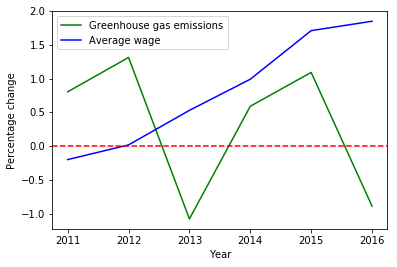

In [85]:
# a Plot 1 - Percentage change in CO2 emissions and wages over time 
plt.plot(GHG_change,color="g")
plt.plot(AW_change,color="b")
plt.xlabel("Year")
plt.ylabel("Percentage change")
plt.legend(["Greenhouse gas emissions","Average wage"])
plt.axhline(y=0,color="r",linestyle="dashed")
plt.show()

The graph shows the average change in both average wages and CO2 emissions for all OECD countries from year to year in the 2010-2016 period. We have created the plotted variable, GHG_change, in the section "Creating new variables" line 80. Though a rising trend in average wages for all OECD countries is distinguishable, greenhouse gas emissions have been subject to strong fluctuations, so that a connection between the two variables is not clear to see. 

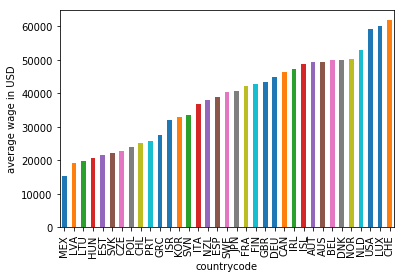

In [86]:
# a Plot 2: Average wages by country  
plt.clf
av_w_c= data_all.groupby("countrycode")["average wage"].mean().sort_values()
av_w_c.plot.bar()
plt.xlabel("countrycode")
plt.ylabel("average wage in USD")
plt.show()

This bar graph shows the average wages in US dollars for each OECD country over the 2010 - 2016 period. Our translation function in the section "New functions" line 84 provides the possibility to easily translate the country code to the country name. While the highest wages are earned in Switzerland, Mexico portrays the lowest average wages in the OECD.

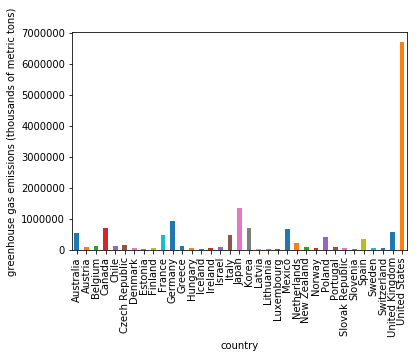

In [87]:
# a: Plot 3: Average CO2 emissions by country
plt.clf
av_e_c= data_all.groupby("country")["emissions_GHG"].mean()
plt.ylabel("greenhouse gas emissions (thousands of metric tons)")
plt.xlabel("countrycode")
av_e_c.plot.bar()
plt.show()

This very similar bar graph shows average greenhouse gas emissions (in thousand metric tons) for all OECD countries between 2010 and 2016. While, among others, Japan and Germany have emitted sizable amounts of greenhouse gases, it is clear to see that the United States's emissions by far exceed that of any other OECD country. 

C:\Users\augus\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


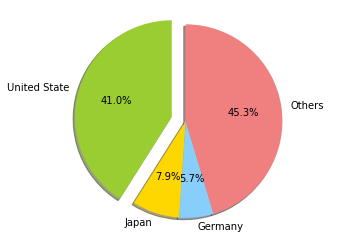

In [116]:
# a Plot 4: Pie chart of greenhouse gas emissions
plt.clf
united_state_d = information('USA', 2016)
country1 = float(united_state_d.loc[:,"emissions_GHG"])
japan_d = information('JPN', 2016)
country2 = float(japan_d.loc[:,"emissions_GHG"])
germany_d = information("DEU", 2016)
country3 = float(germany_d.loc[:,"emissions_GHG"])
others_d = data_all[(~data_all["countrycode"].isin(["USA","JAP","DEU"]))]
others_d = others_d[others_d['year'] == 2016]["emissions_GHG"]
others = float(np.nansum(others_d))

chart = [country1, country2, country3, others]
labels = 'United States', 'Japan', 'Germany', 'Others'
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
exp = [0.15 , 0, 0, 0]

fig1, chartg = plt.subplots()
chartg.pie(chart, explode=exp , labels=labels, colors=colors, autopct='%1.1f%%',  shadow=True, startangle=90)

chartg.axis('equal')
plt.show()

The radically high amount of greenhouse gas emissions of the United States compared to other OECD countries (in 2016) is best depicted in this pie chart. We have used the information fuction descrined in the section "New functions" to get the emissions of the relevant countries in the year 2016.

## Interactive model

In [105]:
plt.clf
def get_con(Country = "Australia"):
    print("Country: "+ Country)
    print("Mean of Greenhouse gas emissions:" , round(information(translate(Country,countrycode=False))["emissions_GHG"].mean(),2))  
    print("Mean of average wages:" , round(information(translate(Country,countrycode=False))["average wage"].mean(),2))

    fig, ax = plt.subplots()
    fig.canvas.draw()
    plt.plot(data_all[data_all["country"]==Country]["d_GHG"],color="g")
    plt.plot(data_all[data_all["country"]==Country]["d_aw"],color="b")
    plt.xlabel("Year")
    plt.ylabel("Percentage change")
    labels= ["2010","2011","2012","2013","2014","2015","2016"]
    ax.set_xticklabels(labels) 
    plt.legend(["Greenhouse gas emissions","Average wage"])
    plt.axhline(y=0,color="r",linestyle="dashed")
    plt.show()

    return 

widgets.interact(get_con,Country=data_all["country"].unique())

interactive(children=(Dropdown(description='Country', options=('Australia', 'Austria', 'Belgium', 'Canada', 'S…

<function __main__.get_con(Country='Australia')>